# Part 2

In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('troop_movements.csv')
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-08 12:34:33,1,tie_silencer,resistance,10,5,10,2,Sullust
1,2025-07-08 12:34:32,2,tie_silencer,resistance,10,6,7,10,Stewjon
2,2025-07-08 12:34:31,3,stormtrooper,empire,6,1,4,7,Stewjon
3,2025-07-08 12:34:30,4,unknown,empire,6,9,8,4,Muunilinst
4,2025-07-08 12:34:29,5,tie_fighter,resistance,5,1,3,9,Mon Cala


## Counts of Empire vs Resistance

In [25]:
emp_or_res = df.groupby("empire_or_resistance").size().reset_index(name='count')
emp_or_res

,empire_or_resistance,count
0,empire,487
1,resistance,513


## Counts of characters by homeworld

In [44]:
df.groupby('homeworld').size().reset_index(name='count')

,homeworld,count
0,Alderaan,25
1,Aleen Minor,25
2,Bestine IV,28
3,Cerea,19
4,Champala,23
5,Chandrila,24
6,Concord Dawn,24
7,Corellia,25
8,Dagobah,29
9,Dathomir,20


## Counts fo characters by unit_type

In [45]:
df.groupby('unit_type').size().reset_index(name="count")

,unit_type,count
0,at-at,122
1,at-st,129
2,resistance_soldier,107
3,stormtrooper,138
4,tie_fighter,125
5,tie_silencer,140
6,unknown,119
7,x-wing,120


### Adding a new feature named is_resistance with a True or False value based on empire_or_resistance

In [46]:
df["is_resistance"] = df['empire_or_resistance'] == 'resistance'
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-08 12:34:33,1,tie_silencer,resistance,10,5,10,2,Sullust,True
1,2025-07-08 12:34:32,2,tie_silencer,resistance,10,6,7,10,Stewjon,True
2,2025-07-08 12:34:31,3,stormtrooper,empire,6,1,4,7,Stewjon,False
3,2025-07-08 12:34:30,4,unknown,empire,6,9,8,4,Muunilinst,False
4,2025-07-08 12:34:29,5,tie_fighter,resistance,5,1,3,9,Mon Cala,True


## Empire vs Resistance distribution

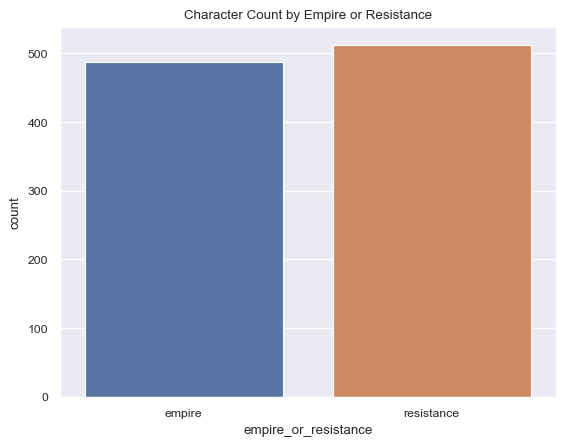

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme("paper")
palette = {'empire': 'red', 'resistance': 'blue'}
sns.barplot(data=emp_or_res, x="empire_or_resistance", y="count", hue="empire_or_resistance")
plt.title("Character Count by Empire or Resistance")
plt.show()

## Prediction Model
```
A prediction model using sklearn.tree.DecisionTreeClassifier that predicts if a character is joining either the Empire or the Resistance based on their homeworld and unit_type
```
```
A Decision Tree is a machine learning model used for classification and regression tasks. It works by splitting data into smaller and smaller groups based on feature values, creating a tree-like structure of decisions.
```

In [48]:
X = df[["homeworld", "unit_type"]]
y = df['is_resistance']

- ___Convert categorical features to numeric using pd.get_dummies___

In [49]:
X_encoded = pd.get_dummies(X, columns=['homeworld', 'unit_type'])
X_encoded

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [51]:
X_encoded_train, X_encoded_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

In [52]:
model = DecisionTreeClassifier(random_state=42)

In [53]:
model.fit(X_encoded_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [54]:
y_pred = model.predict(X_encoded_test)

- ___Accuracy___

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accurace: {accuracy}")

Accurace: 0.59


## Feature importances

In [56]:
importance = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, "Importance": importance})
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)

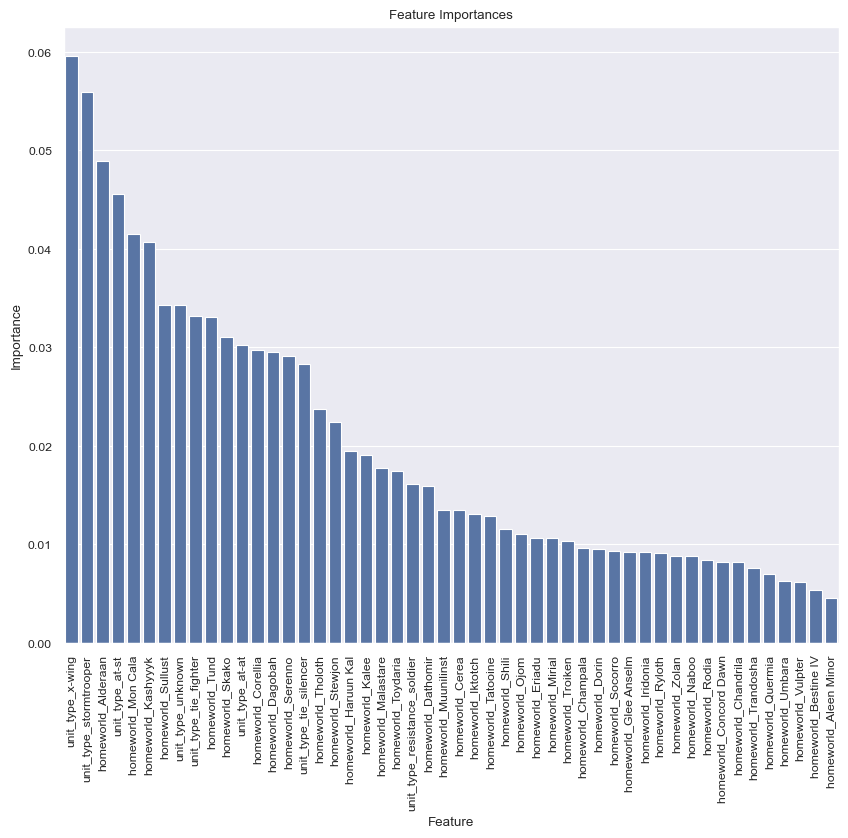

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(x=feature_importances['Feature'], y=feature_importances['Importance'])
plt.xticks(rotation = 90)
plt.title("Feature Importances")
plt.show()

## Saving the Model As a Binary File

In [58]:
import pickle

with open("trained_model.plk", "wb") as f:
    pickle.dump(model, f)
